In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.8 kB ? eta -:--:--
     ------- ----------------------------- 30.7/160.8 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/160.8 kB 326.8 kB/s eta 0:00:01
     --------- --------------------------- 41.0/160.8 kB 326.8 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/160.8 kB 272.3 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/160.8 kB 272.3 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/160.8 kB 272.3 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.8 kB 327.2 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.8 kB 327.2 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.8 kB 327.2 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.8 kB 327.2 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.8

In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator     
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D    
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)



Tensorflow version: 2.15.0


# Exploring data

# Preparing Data for Training

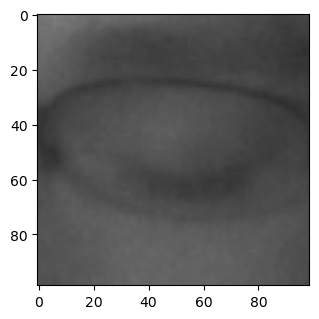

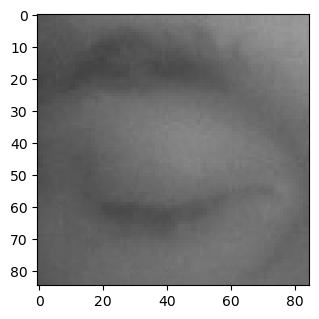

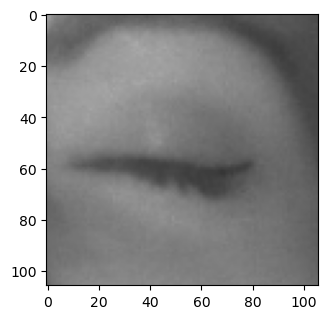

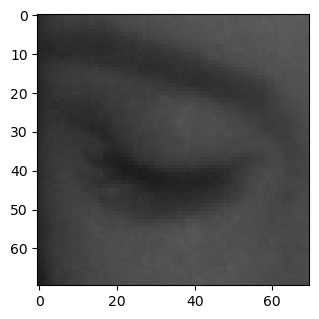

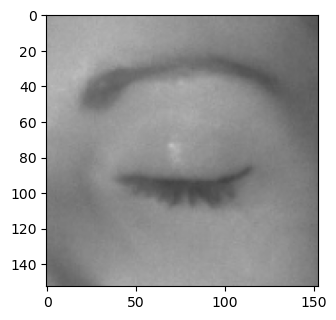

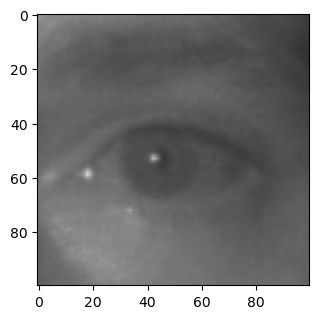

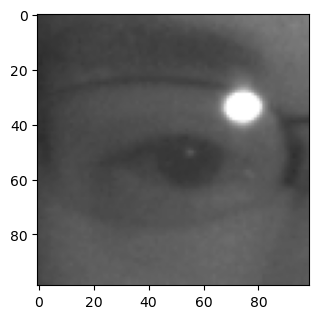

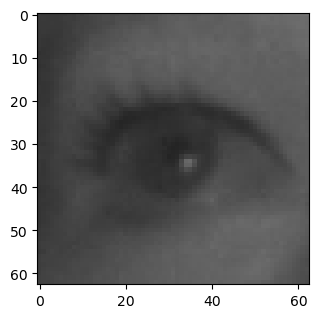

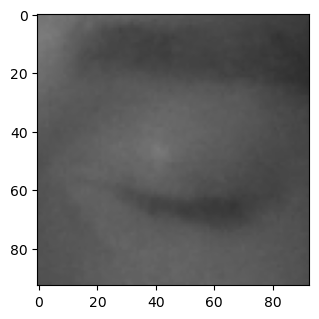

In [23]:
images=glob("train/**/**")     #it will display random images of figsize(12,12)
for i in range(9):
    image=random.choice(images)               #it will display random images of figsize(12,12)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('on') 

In [15]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()   #for generator we used train data
train_generator = datagen_train.flow_from_directory("C:/Users/vv/Desktop/Drowsiness/train",
                                                    target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)


Found 4000 images belonging to 2 classes.


In [16]:
pip install Tqdm

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd


In [9]:
X= []
Y= []
for i in tqdm(glob('train/Open_Eyes/*')):
    temp=np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('train/Closed_Eyes/*')):
    temp=np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:27<00:00, 72.57it/s]


In [18]:
from tensorflow.keras.layers import Dense,Input,Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
model =tf.keras.models.Sequential([
    Input(shape=(64,64,1)),
    
    
    Conv2D(filters=32,kernel_size=5,strides=1,activation='relu'),
    Conv2D(filters=32,kernel_size=3,strides=1,activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    
    
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'),
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    
    
    Flatten(),
    Dense(units = 256,activation ='relu',use_bias=False),
    BatchNormalization(),
    
    Dense(units=128,use_bias=False,activation='relu'),

    
    Dense(units=84,use_bias=False,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=1,activation='sigmoid')

])

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert TensorFlow tensors to NumPy arrays
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

# Use train_test_split to create validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_np, y_train_np, test_size=0.2, random_state=42)

# Rest of your code remains unchanged
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=32, callbacks=[callback])

Epoch 1/30


67/67 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9585
Epoch 1: val_loss improved from inf to 0.42931, saving model to bestModel.h5
67/67 [==============================] - 23s 293ms/step - loss: 0.1180 - accuracy: 0.9585 - val_loss: 0.4293 - val_accuracy: 0.7631
Epoch 2/30


C:\Users\vv\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - ETA: 0s - loss: 0.0348 - accuracy: 0.9897
Epoch 2: val_loss improved from 0.42931 to 0.26830, saving model to bestModel.h5
67/67 [==============================] - 21s 312ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.2683 - val_accuracy: 0.8750
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9949
Epoch 3: val_loss did not improve from 0.26830
67/67 [==============================] - 18s 275ms/step - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.4521 - val_accuracy: 0.8657
Epoch 4/30
67/67 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9981
Epoch 4: val_loss improved from 0.26830 to 0.01303, saving model to bestModel.h5
67/67 [==============================] - 18s 263ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 0.9981
Epoch 5/30
67/67 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9949
Epoch 5: val_loss did not impr

In [30]:
model.evaluate(x_val, y_val)

17/17 [==============================] - 1s 63ms/step - loss: 8.2834e-04 - accuracy: 1.0000


[0.0008283428614959121, 1.0]

In [32]:
from keras.models import load_model
best_model = load_model('bestModel.h5')
best_model.evaluate(x_val, y_val)

17/17 [==============================] - 1s 67ms/step - loss: 8.2834e-04 - accuracy: 1.0000


[0.0008283428614959121, 1.0]

1/1 [==============================] - 0s 255ms/step


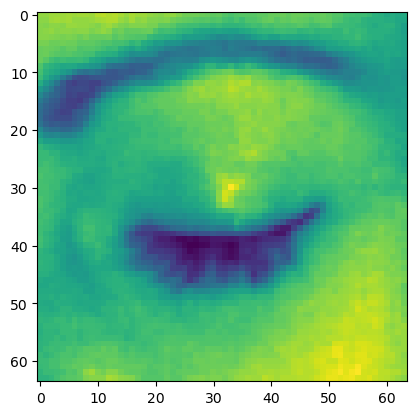

Closed
1/1 [==============================] - 0s 33ms/step


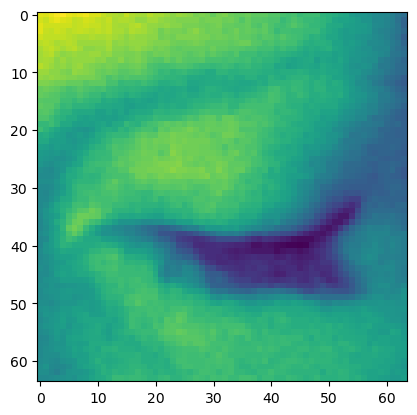

Closed
1/1 [==============================] - 0s 32ms/step


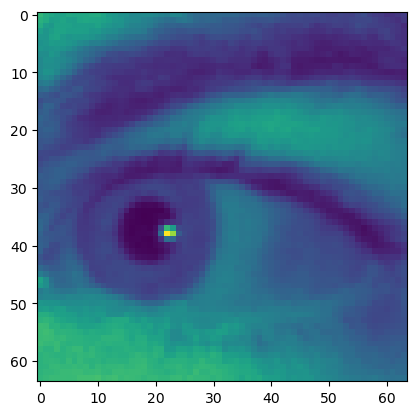

Open
1/1 [==============================] - 0s 42ms/step


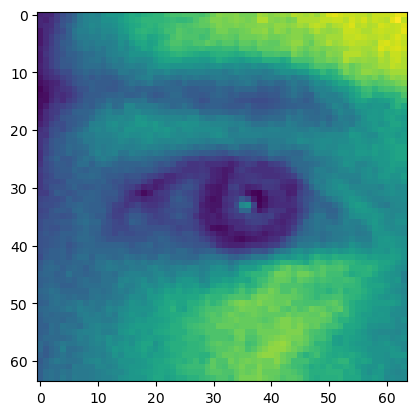

Open
1/1 [==============================] - 0s 52ms/step


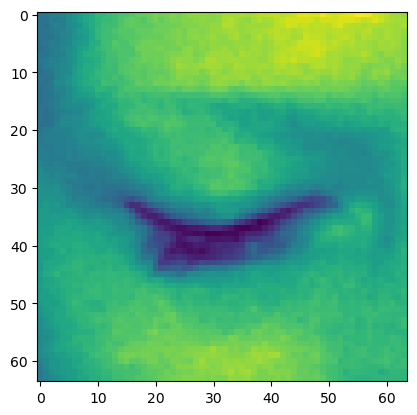

Closed


In [33]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print('Closed')

17/17 [==============================] - 1s 62ms/step


Text(0.5, 25.722222222222214, 'Actual')

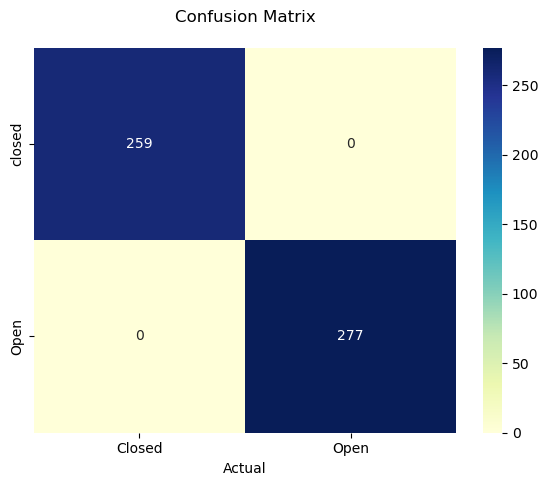

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15,5))

preds = best_model.predict(x_val)
preds =(preds >= 0.5).astype(np.int32)
cm=confusion_matrix(y_val,preds)
df_cm=pd.DataFrame(cm,index=['closed','Open'], columns=['Closed','Open'])
plt.subplot(121)
plt.title("Confusion Matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Actual")

In [38]:
accuracy =best_model.evaluate(x_val,y_val)[1]
print("Accuracy:",accuracy)

17/17 [==============================] - 1s 63ms/step - loss: 8.2834e-04 - accuracy: 1.0000
Accuracy: 1.0


In [39]:
model_json = model.to_json()
with open('model_a.json',"w") as json_file:
    json_file.write(model_json)